In [1]:
import pathlib 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import sleepPy.preprocessing as prep
import sleepPy.plots as plot
import actiPy.actogram_plot as aplot

In [2]:
def quickplot_h(data):
    data.resample("H").mean().plot(subplots=True,
                                  figsize=(10,10))
def quickplot(data):
    data.plot(subplots=True,
               figsize=(10,10))

In [3]:
col_names = ["Chamber", "PIR1", "PIR2", "PIR3", "PIR4", "PIR5", "PIR6", "LDR"]

In [4]:
pir_files_dir = pathlib.Path('/Users/angusfisk/Documents/01_PhD_files/09_pirdata')

exp_filesdir = pir_files_dir / "03_experiment_files"

In [11]:
# read df's in
exp = sorted(exp_filesdir.glob("exp_5*"))

file = exp[4]
df = pd.read_csv(file, 
                 index_col=[0],
                 parse_dates=True)

In [12]:
df.columns=col_names
df.drop(col_names[0], axis=1, inplace=True)
df.sort_index(inplace=True)

In [13]:
df.head()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2017-09-01 00:00:03.815,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-01 00:00:13.829,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-01 00:00:23.843,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-01 00:00:33.862,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-01 00:00:43.876,0.0,0.0,0.0,0.0,0.0,0.0,0.0


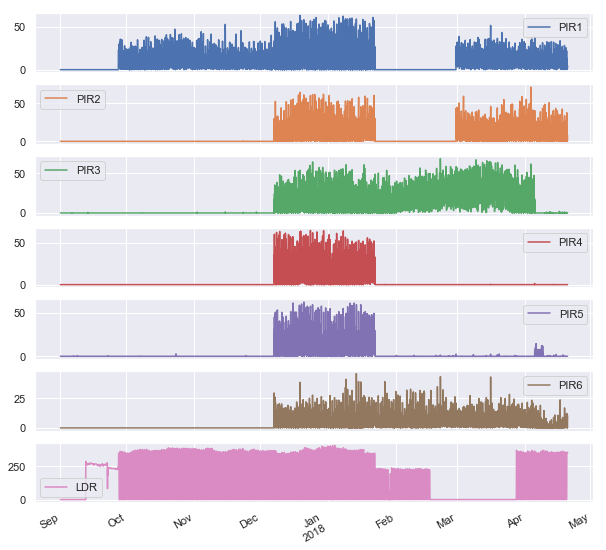

In [14]:
quickplot_h(df)

In [9]:
# Separate into just the ageing part 
start_date = "2016-10-04"
finish_date = '2017-10-04'
ageing_data = df.loc[start_date:finish_date].copy()

In [10]:
ageing_data.head()


,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2016-10-04 00:00:04.282,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-04 00:00:14.307,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-04 00:00:24.330,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-04 00:00:34.353,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-04 00:00:44.376,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
ageing_data.tail()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2017-10-04 23:59:17.545,18.0,29.0,62.0,0.0,14.0,0.0,0.0
2017-10-04 23:59:27.567,70.0,12.0,54.0,0.0,60.0,0.0,0.0
2017-10-04 23:59:37.594,45.0,27.0,79.0,0.0,35.0,0.0,0.0
2017-10-04 23:59:47.615,0.0,38.0,57.0,0.0,73.0,0.0,0.0
2017-10-04 23:59:57.638,0.0,55.0,74.0,0.0,39.0,0.0,0.0


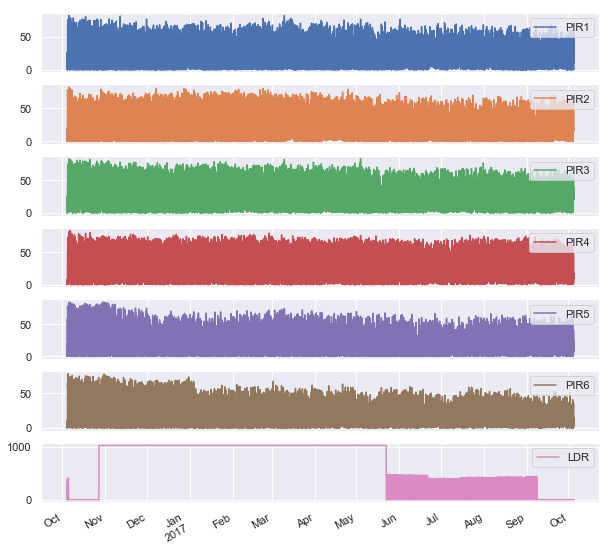

In [12]:
# check the data is all there and looks good 
quickplot_h(ageing_data)

All data present and correct. Light cycles are wrong from October-Jun though, and Sep-Oct again.

Check when the lights go on and off, then set all time for that

Don't think have to worry about time changes ..... <- will check with actograms later 

In [13]:
# select a bit of time when the lights are working
lights_working = ageing_data.loc['2017-07']

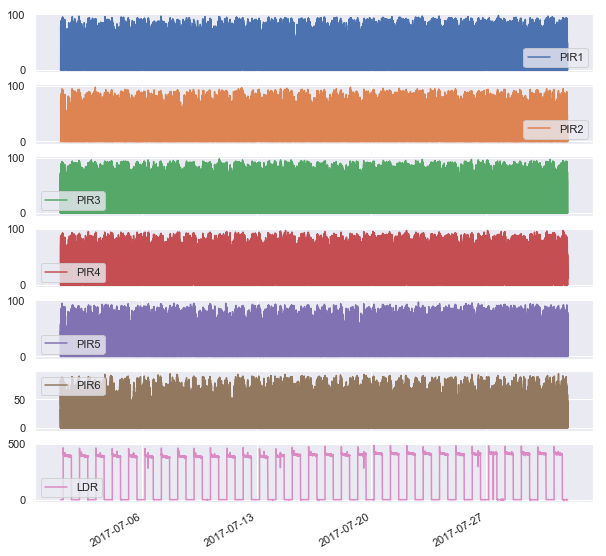

In [14]:
quickplot(lights_working)

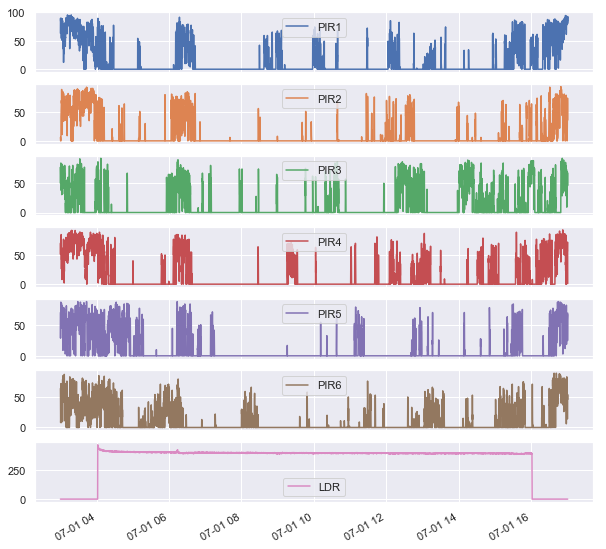

In [15]:
# When are the lights actually on. 

test_day = lights_working.loc['2017-07-01 03:00': '2017-07-01 17:00']
quickplot(test_day)

Lights go on at 0400 and off at 1600. Set the ageing data to that. 

In [16]:
fix_lights_on = ageing_data.between_time("04:00:00", "16:00:00").copy()
fix_lights_on.iloc[:, -1] = 500
fix_lights_off = ageing_data.between_time("16:00:00", "04:00:00").copy()
fix_lights_off.iloc[:, -1] = 0

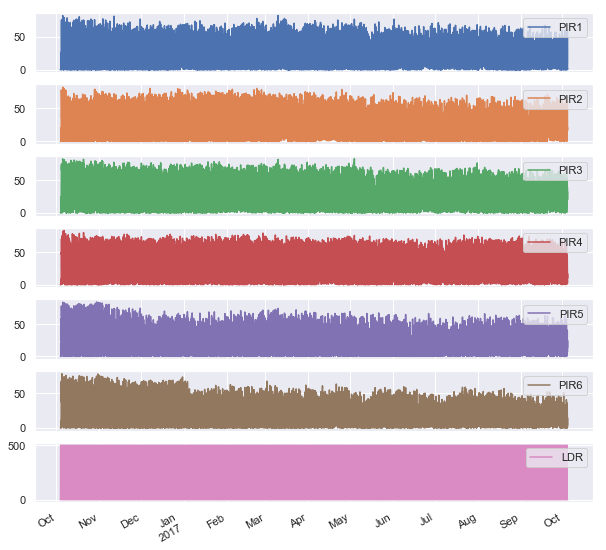

In [17]:
ageing_data.update(fix_lights_on)
ageing_data.update(fix_lights_off)
quickplot_h(ageing_data)

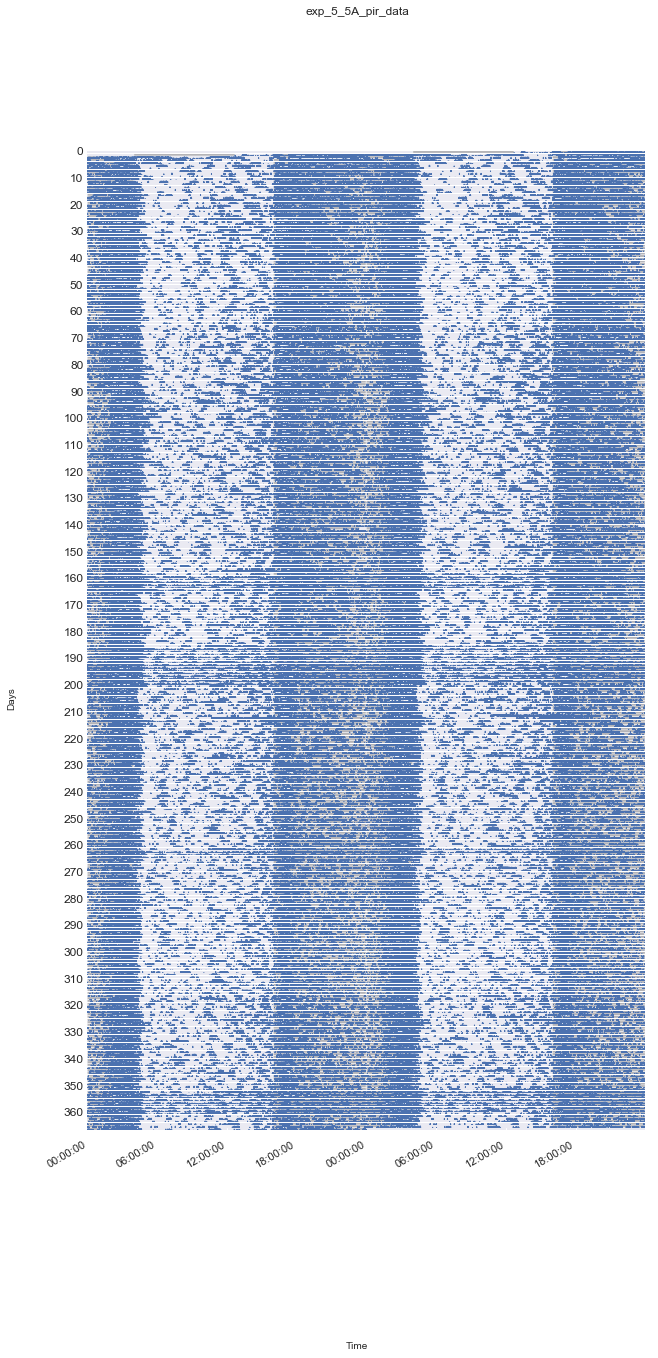

In [18]:
# check it all looks good with an actgoram 
# Lines on actogram are an artefact of drawing in a small area 
ageing_h = ageing_data.resample("H").mean()
aplot._actogram_plot_from_df(ageing_data, 1, drop_level=False, fname=file, figsize=(10, 20))

In [19]:
# save the csv 

In [20]:
save_dir = pathlib.Path("/Users/angusfisk/Documents/01_PhD_files/"
                        "01_projects/01_thesisdata/04_ageing/01_datafiles/01_activity")

save_name = save_dir / "ld.csv"

ageing_data.to_csv(save_name)

Next step - find hte post disrupted period of group housing and save it as a post file 


In [33]:
start_post = '2017-10-05'
end_post = '2017-11-23'

post_data = df.loc[start_post:end_post].copy()

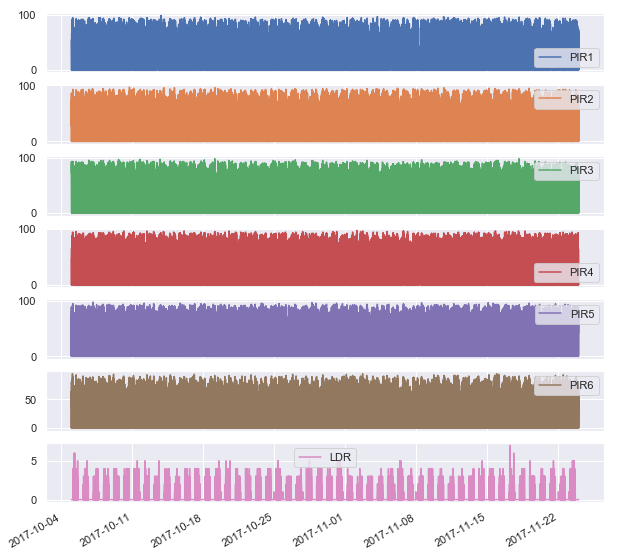

In [34]:
quickplot(post_data)

In [28]:
post_data.tail()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2017-11-23 23:59:11.995,0.0,0.0,0.0,0.0,26.0,0.0,0.0
2017-11-23 23:59:22.017,0.0,0.0,45.0,0.0,8.0,0.0,0.0
2017-11-23 23:59:32.040,0.0,0.0,42.0,0.0,62.0,0.0,0.0
2017-11-23 23:59:42.063,0.0,0.0,62.0,0.0,65.0,0.0,0.0
2017-11-23 23:59:52.084,0.0,0.0,52.0,0.0,62.0,0.0,0.0


Final Step have to fix the LDR values


In [77]:
day_data = post_data.between_time("04:00:00", "16:00:00")
day_data.iloc[:, -1] = 500
day_data

In [84]:
post_data.loc[post_data.between_time("04:00:00", "16:00:00").index, "LDR"] = 500



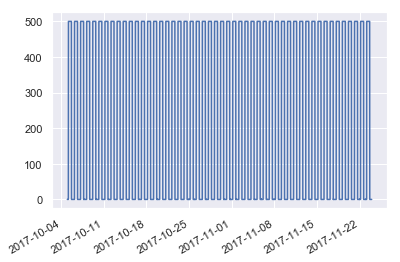

In [85]:
post_data.iloc[:, -1].plot() 


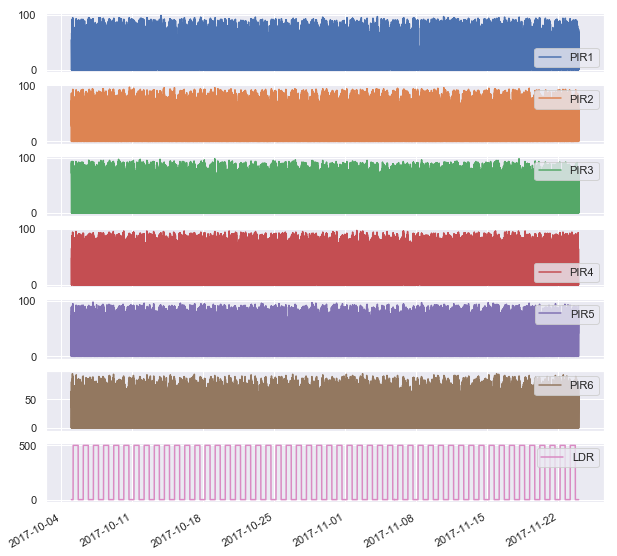

In [86]:
quickplot(post_data)


In [87]:
post_save_name = save_dir / "01_post_disrupt/ld_post.csv"

post_data.to_csv(post_save_name)